In [1]:
install.packages("arules")
install.packages("readr")
install.packages("arulesViz")
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘zoo’, ‘Rcpp’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘lmtest’, ‘ggplot2’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Warning message in install.packages("arulesViz"):
“installation of package ‘igraph’ had non-zero exit status”
Warning message in install.packages("arulesViz"):
“installation of package ‘tidygraph’ had non-zero exit status”
Warning message in install.packages("arulesViz"):
“installation of package ‘graphlayouts

In [3]:
library(arules)
library(readr)
library(RColorBrewer)

In [5]:
dataTrans <- read.transactions("newBC1.csv",
                           rm.duplicates = FALSE,
                           format = "basket",
                           sep=",",
                           cols=1)
inspect(dataTrans)

        items                                transactionID
[1]     {$60K - $80K, Blue, Married}         High School  
[2]     {Blue, Less than $40K, Single}       Graduate     
[3]     {$80K - $120K, Blue, Married}        Graduate     
[4]     {Blue, Less than $40K, Married}      High School  
[5]     {$60K - $80K, Blue, Married}         Uneducated   
[6]     {$40K - $60K, Blue, Married}         Graduate     
[7]     {$120K +, Gold, Married}             Graduate     
[8]     {$60K - $80K, Married, Silver}       High School  
[9]     {$60K - $80K, Blue, Single}          Uneducated   
[10]    {$80K - $120K, Blue, Single}         Graduate     
[11]    {$120K +, Blue, Married}             Uneducated   
[12]    {$40K - $60K, Blue, Married}         Graduate     
[13]    {$80K - $120K, Blue, Single}         College      
[14]    {$60K - $80K, Blue, Married}         Graduate     
[15]    {Blue, Less than $40K, Married}      Graduate     
[16]    {$80K - $120K, Blue, Married}        Graduate   

In [6]:
# Use apriori to get the RULES
FrulesK = arules::apriori(dataTrans, parameter = list(support=.15,
                                                 confidence=.15, minlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.15    0.1    1 none FALSE            TRUE       5    0.15      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1519 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 10127 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [18 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [7]:
inspect(FrulesK)

     lhs                          rhs              support   confidence
[1]  {$40K - $60K}             => {Blue}           0.1653994 0.9357542 
[2]  {Blue}                    => {$40K - $60K}    0.1653994 0.1775117 
[3]  {Single}                  => {Less than $40K} 0.1849511 0.4750190 
[4]  {Less than $40K}          => {Single}         0.1849511 0.4008132 
[5]  {Single}                  => {Blue}           0.3578552 0.9190971 
[6]  {Blue}                    => {Single}         0.3578552 0.3840610 
[7]  {Less than $40K}          => {Married}        0.2422238 0.5249305 
[8]  {Married}                 => {Less than $40K} 0.2422238 0.4512509 
[9]  {Less than $40K}          => {Blue}           0.4392219 0.9518511 
[10] {Blue}                    => {Less than $40K} 0.4392219 0.4713862 
[11] {Married}                 => {Blue}           0.5051842 0.9411332 
[12] {Blue}                    => {Married}        0.5051842 0.5421789 
[13] {Less than $40K, Single}  => {Blue}           0.1747803 0.9

In [ ]:
library(arulesViz)

plot(FrulesK, method = "graph", control = list(type = "items"))

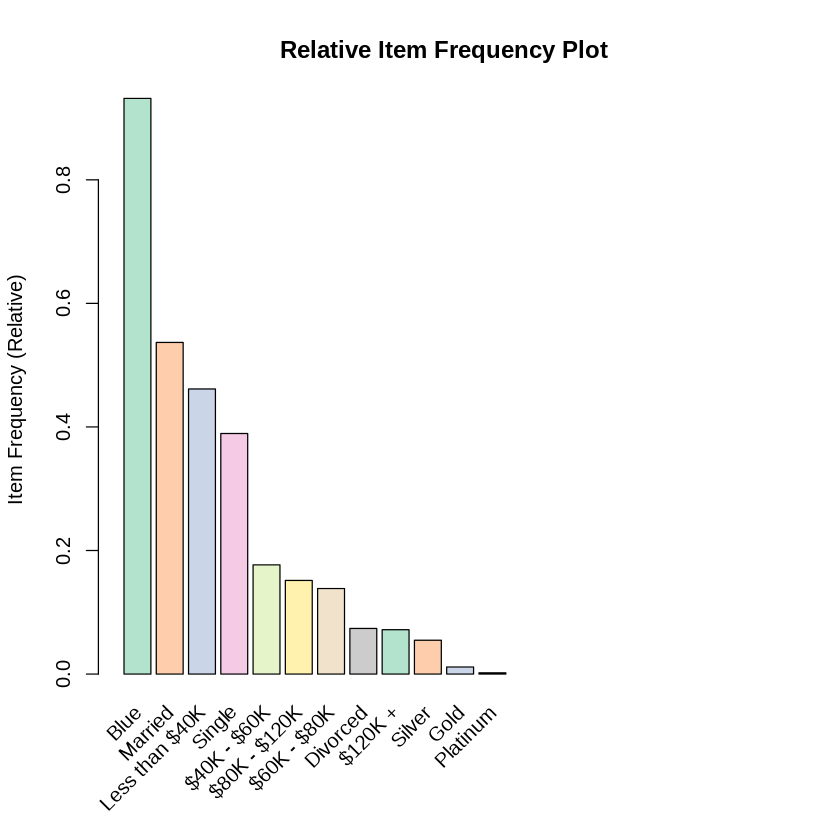

In [8]:
# Plot of which items are most frequent

arules::itemFrequencyPlot(dataTrans, topN = 20,
                          col = brewer.pal(8, 'Pastel2'),
                          main = 'Relative Item Frequency Plot',
                          type = "relative", #absolute
                          ylab = "Item Frequency (Relative)")

In [9]:
RulesByCofidence <- sort(FrulesK, by="confidence", decreasing=TRUE)
inspect(RulesByCofidence[1:15])

     lhs                          rhs              support   confidence
[1]  {Less than $40K, Married} => {Blue}           0.2320529 0.9580106 
[2]  {Less than $40K}          => {Blue}           0.4392219 0.9518511 
[3]  {Less than $40K, Single}  => {Blue}           0.1747803 0.9450080 
[4]  {Married}                 => {Blue}           0.5051842 0.9411332 
[5]  {$40K - $60K}             => {Blue}           0.1653994 0.9357542 
[6]  {Single}                  => {Blue}           0.3578552 0.9190971 
[7]  {Blue}                    => {Married}        0.5051842 0.5421789 
[8]  {Blue, Less than $40K}    => {Married}        0.2320529 0.5283273 
[9]  {Less than $40K}          => {Married}        0.2422238 0.5249305 
[10] {Blue, Single}            => {Less than $40K} 0.1747803 0.4884106 
[11] {Single}                  => {Less than $40K} 0.1849511 0.4750190 
[12] {Blue}                    => {Less than $40K} 0.4392219 0.4713862 
[13] {Blue, Married}           => {Less than $40K} 0.2320529 0.4

In [10]:
RulesByLift <- sort(FrulesK, decreasing = TRUE, by = "lift")
inspect(RulesByLift[1:15])

     lhs                          rhs              support   confidence
[1]  {Blue, Single}            => {Less than $40K} 0.1747803 0.4884106 
[2]  {Single}                  => {Less than $40K} 0.1849511 0.4750190 
[3]  {Less than $40K}          => {Single}         0.1849511 0.4008132 
[4]  {Less than $40K, Married} => {Blue}           0.2320529 0.9580106 
[5]  {Blue, Less than $40K}    => {Single}         0.1747803 0.3979317 
[6]  {Blue}                    => {Less than $40K} 0.4392219 0.4713862 
[7]  {Less than $40K}          => {Blue}           0.4392219 0.9518511 
[8]  {Less than $40K, Single}  => {Blue}           0.1747803 0.9450080 
[9]  {Married}                 => {Blue}           0.5051842 0.9411332 
[10] {Blue}                    => {Married}        0.5051842 0.5421789 
[11] {$40K - $60K}             => {Blue}           0.1653994 0.9357542 
[12] {Blue}                    => {$40K - $60K}    0.1653994 0.1775117 
[13] {Blue, Married}           => {Less than $40K} 0.2320529 0.4

In [11]:
RulesBySupport <- sort(FrulesK, decreasing = TRUE, by = "support")
inspect(RulesBySupport[1:15])

     lhs                          rhs              support   confidence
[1]  {Married}                 => {Blue}           0.5051842 0.9411332 
[2]  {Blue}                    => {Married}        0.5051842 0.5421789 
[3]  {Less than $40K}          => {Blue}           0.4392219 0.9518511 
[4]  {Blue}                    => {Less than $40K} 0.4392219 0.4713862 
[5]  {Single}                  => {Blue}           0.3578552 0.9190971 
[6]  {Blue}                    => {Single}         0.3578552 0.3840610 
[7]  {Less than $40K}          => {Married}        0.2422238 0.5249305 
[8]  {Married}                 => {Less than $40K} 0.2422238 0.4512509 
[9]  {Less than $40K, Married} => {Blue}           0.2320529 0.9580106 
[10] {Blue, Less than $40K}    => {Married}        0.2320529 0.5283273 
[11] {Blue, Married}           => {Less than $40K} 0.2320529 0.4593432 
[12] {Single}                  => {Less than $40K} 0.1849511 0.4750190 
[13] {Less than $40K}          => {Single}         0.1849511 0.4

In [12]:
BlueRules <- apriori(data=dataTrans,parameter = list(supp=.001, conf=.01, minlen=2),
                     appearance = list(default="lhs", rhs="Blue"),
                     control=list(verbose=FALSE))
BlueRules <- sort(BlueRules, decreasing=TRUE, by="confidence")
inspect(BlueRules[1:4])

    lhs                           rhs    support    confidence coverage  
[1] {Less than $40K, Married}  => {Blue} 0.23205293 0.9580106  0.24222376
[2] {Less than $40K}           => {Blue} 0.43922188 0.9518511  0.46143972
[3] {$40K - $60K, Married}     => {Blue} 0.08857510 0.9462025  0.09361114
[4] {Divorced, Less than $40K} => {Blue} 0.03238866 0.9452450  0.03426484
    lift     count
[1] 1.028166 2350 
[2] 1.021555 4448 
[3] 1.015493  897 
[4] 1.014465  328 


In [13]:
Less_than_40KRules <- apriori(data=dataTrans,parameter = list(supp=.001, conf=.01, minlen=2),
                       appearance = list(default="rhs", lhs="Less than $40K"),
                       control=list(verbose=FALSE))
Less_than_40KRules <- sort(Less_than_40KRules, decreasing=TRUE, by="support")
inspect(Less_than_40KRules[1:4])

    lhs                 rhs        support    confidence coverage  lift     
[1] {Less than $40K} => {Blue}     0.43922188 0.95185106 0.4614397 1.0215553
[2] {Less than $40K} => {Married}  0.24222376 0.52493045 0.4614397 0.9779196
[3] {Less than $40K} => {Single}   0.18495112 0.40081318 0.4614397 1.0294281
[4] {Less than $40K} => {Divorced} 0.03426484 0.07425637 0.4614397 1.0053399
    count
[1] 4448 
[2] 2453 
[3] 1873 
[4]  347 
